In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame(pd.read_csv(r"F:\LPU\Data\Datasets\Internship datasets\loan.csv"))
df.head(5)

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,1.0,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,Rural,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-23855,Nathalie Olivier,M,43,2361.56,1.0,Working,Laborers,Semi-Urban,152561.34,...,637.29,0,Semi-Urban,227,2361.56,1,Semi-Urban,1,221050.80,0.00
2,C-24944,Barbie Goetsch,M,18,1546.17,1.0,Working,Laborers,Rural,42091.29,...,613.24,0,Urban,883,1546.17,2,Urban,1,67993.43,0.00
3,C-40801,Laree Staton,M,18,2416.86,1.0,State servant,Core staff,Semi-Urban,25765.72,...,652.41,0,Rural,325,2416.86,2,Rural,1,32423.71,16747.72
4,C-37677,Xenia Browder,F,39,2719.74,1.0,Commercial associate,High skill tech staff,Semi-Urban,20879.96,...,646.21,0,Rural,196,2719.74,2,Rural,0,33568.47,0.00


In [3]:
df = df.drop('Property Age',axis=1)
df.head(5)

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,1.0,Working,Sales staff,Semi-Urban,72809.58,...,3.0,809.44,0,Rural,746,4,Rural,1,119933.46,54607.18
1,C-23855,Nathalie Olivier,M,43,2361.56,1.0,Working,Laborers,Semi-Urban,152561.34,...,2.0,637.29,0,Semi-Urban,227,1,Semi-Urban,1,221050.80,0.00
2,C-24944,Barbie Goetsch,M,18,1546.17,1.0,Working,Laborers,Rural,42091.29,...,2.0,613.24,0,Urban,883,2,Urban,1,67993.43,0.00
3,C-40801,Laree Staton,M,18,2416.86,1.0,State servant,Core staff,Semi-Urban,25765.72,...,1.0,652.41,0,Rural,325,2,Rural,1,32423.71,16747.72
4,C-37677,Xenia Browder,F,39,2719.74,1.0,Commercial associate,High skill tech staff,Semi-Urban,20879.96,...,2.0,646.21,0,Rural,196,2,Rural,0,33568.47,0.00


### Customer Segmentation

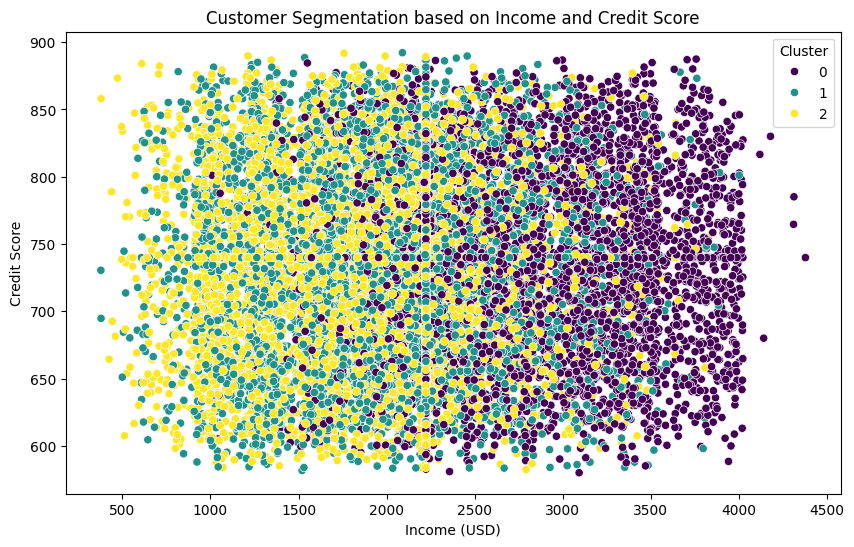

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

features = df[['Age', 'Income (USD)', 'Credit Score', 'Loan Amount Request (USD)']].dropna()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
df['Cluster'] = clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income (USD)', y='Credit Score', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segmentation based on Income and Credit Score')
plt.show()


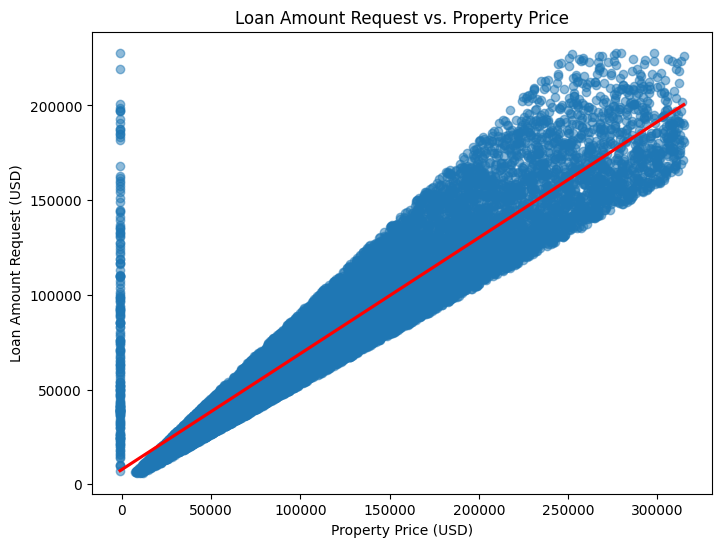

In [5]:
# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Property Price', y='Loan Amount Request (USD)', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Loan Amount Request vs. Property Price')
plt.xlabel('Property Price (USD)')
plt.ylabel('Loan Amount Request (USD)')
plt.show()



In [6]:
print(df['Age'].min())
print(df['Age'].max())

18
65


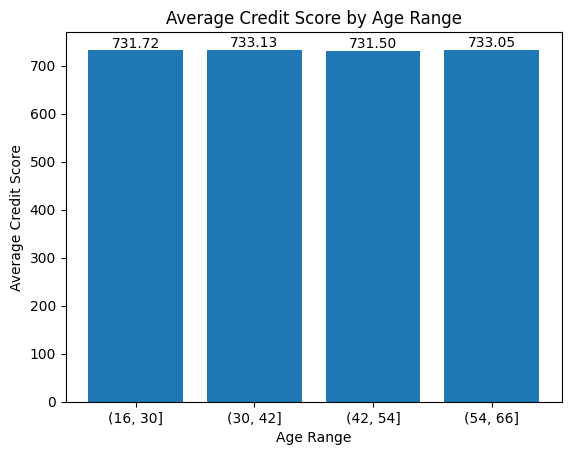

C:\Users\SIDDHARTH\AppData\Local\Temp\ipykernel_16368\2309485259.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(y=approval_rates.values, x=approval_rates.index.astype(str).to_list(), palette='viridis')


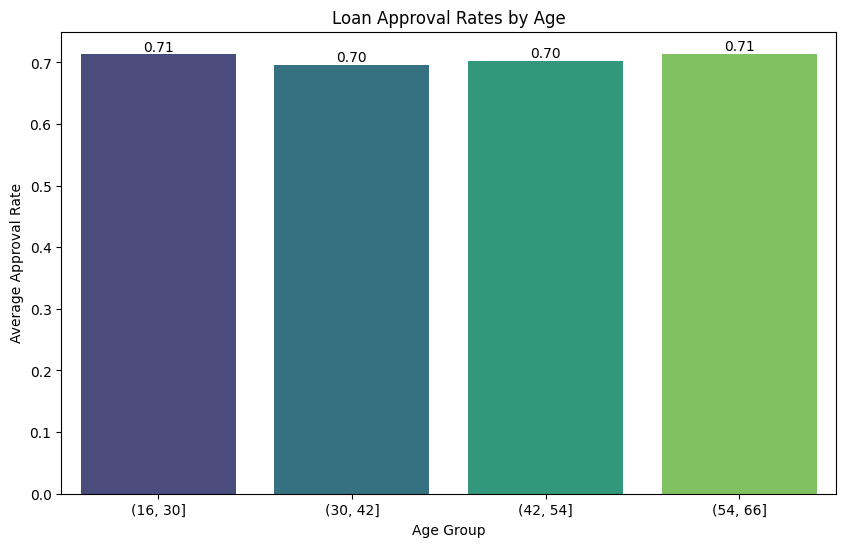

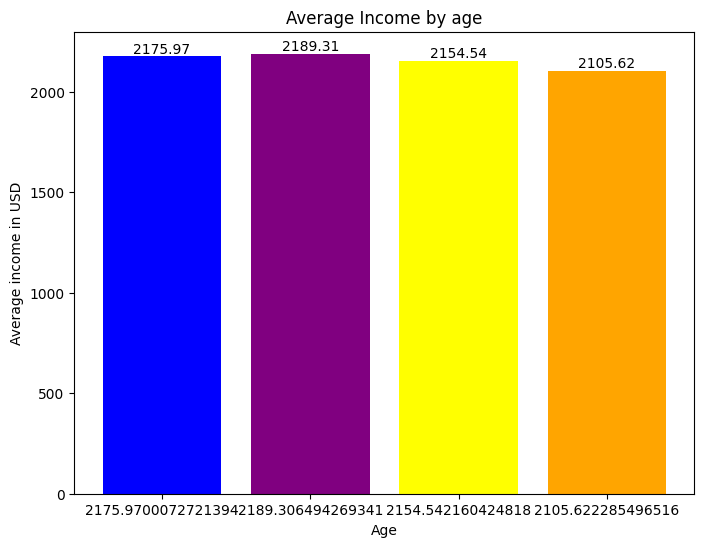

In [7]:
bins = [16, 30, 42, 54, 66]

average_scores = df.groupby(pd.cut(df['Age'], bins=bins), observed=False)['Credit Score'].mean()
age_labels = average_scores.index.astype(str).to_list()

plt.bar(age_labels, average_scores)
plt.xlabel('Age Range')
plt.ylabel('Average Credit Score')
plt.title('Average Credit Score by Age Range')

for i, rate in enumerate(average_scores.values):
    plt.text(i, rate, f'{rate:.2f}', ha='center', va='bottom')
plt.show()


#Loan approval ratess
df['Loan Approved'] = df['Loan Sanction Amount (USD)'].apply(lambda x: 1 if x > 0 else 0)
approval_rates = df.groupby(pd.cut(df['Age'], bins=bins), observed=False)['Loan Approved'].mean()

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(y=approval_rates.values, x=approval_rates.index.astype(str).to_list(), palette='viridis')
plt.title('Loan Approval Rates by Age')
plt.ylabel('Average Approval Rate')
plt.xlabel('Age Group')

for i, rate in enumerate(approval_rates.values):
    bar_plot.text(i, rate, f'{rate:.2f}', ha='center', va='bottom')
plt.show()


#Average income bt age
colors = ['blue', 'purple', 'yellow', 'orange', 'green']
avg_income = (df.groupby(pd.cut(df['Age'], bins=bins), observed=False)['Income (USD)'].mean()).dropna()
plt.figure(figsize=(8, 6))
plt.bar(avg_income.astype(str).to_list(), avg_income.values, color=colors)
plt.xlabel('Age')
plt.ylabel('Average income in USD')
plt.title('Average Income by age')

for i, val in enumerate(avg_income.values):
    plt.text(i, val, f'{val:.2f}', ha='center', va='bottom')
plt.show()

<Figure size 1000x600 with 0 Axes>

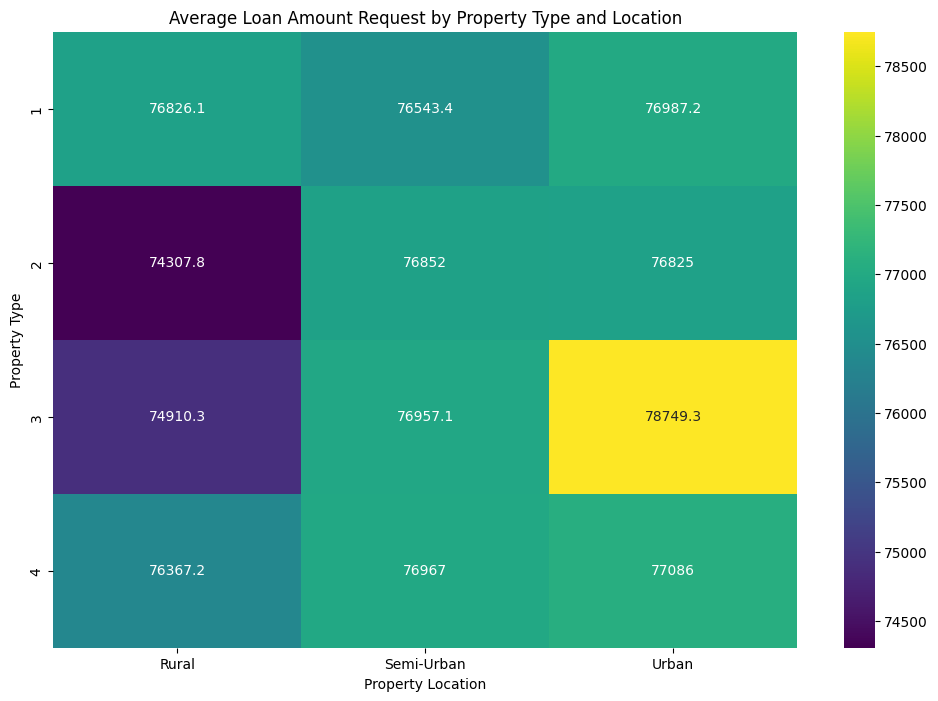

In [8]:
plt.figure(figsize=(10, 6))
grouped_df = df.groupby(['Property Type', 'Property Location'])['Loan Amount Request (USD)'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(grouped_df, annot=True, cmap='viridis', fmt='g')
plt.title('Average Loan Amount Request by Property Type and Location')
plt.xlabel('Property Location')
plt.ylabel('Property Type')
plt.show()


In [9]:
df['Profession'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Businessman'], dtype=object)

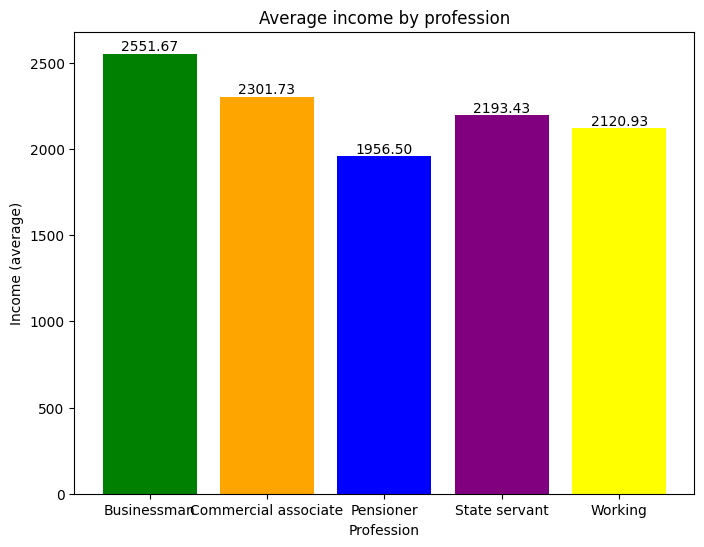

In [10]:
colors = ['green', 'orange', 'blue', 'purple', 'yellow']
val = df.groupby('Profession', observed=False)['Income (USD)'].mean()
plt.figure(figsize=(8,6))
plt.bar(height=val.values, x=val.index, color=colors)
plt.title('Average income by profession')
plt.xlabel('Profession')
plt.ylabel('Income (average)')

for i, value in enumerate(val.values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
plt.show()

In [11]:
df['Credit Score'].unique()

array([809.44, 637.29, 613.24, ..., 709.43, 869.61, 677.27])

In [12]:
print(df['Location'].unique())
print(df['Profession'].unique())

['Semi-Urban' 'Rural' 'Urban']
['Working' 'State servant' 'Commercial associate' 'Pensioner'
 'Businessman']


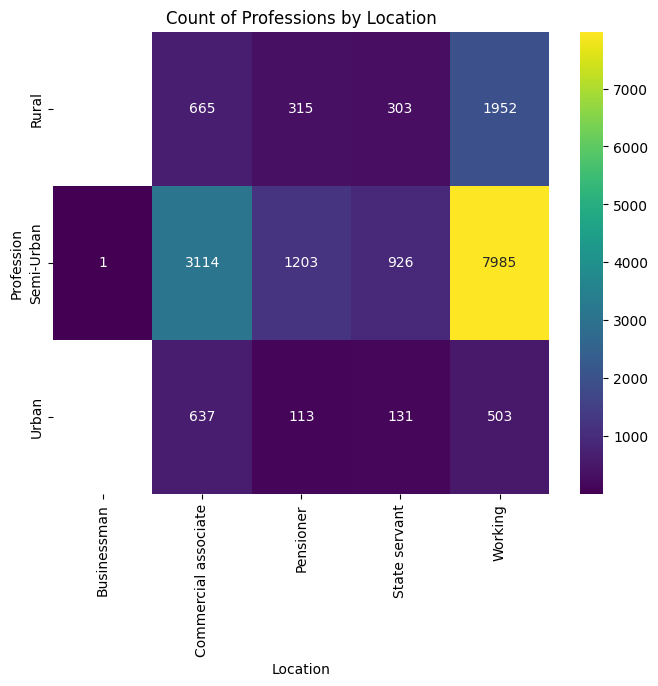

In [13]:
c_of_pr = df.groupby(['Location', 'Profession'], observed=False)['Profession'].count().unstack()

plt.figure(figsize=(8,6))
sns.heatmap(c_of_pr, annot=True, cmap='viridis', fmt='g')
plt.title('Count of Professions by Location')
plt.xlabel('Location')
plt.ylabel('Profession')
plt.show()


In [14]:
df.tail()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,No. of Defaults,Has Active Credit Card,Property ID,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD),Cluster,Loan Approved
17843,C-29993,Levi Guider,M,62,1834.22,1.0,Pensioner,Laborers,Semi-Urban,89484.00,...,0,Semi-Urban,407,2,Semi-Urban,0,164726.89,68992.11,2,1
17844,C-29555,Magdalena Hu,F,37,3513.48,1.0,State servant,Laborers,Semi-Urban,78208.24,...,0,Urban,389,2,Urban,1,144867.54,46616.60,0,1
17845,C-35437,Antonio Binder,F,18,1637.24,1.0,Working,High skill tech staff,Semi-Urban,115975.08,...,0,Rural,538,3,Rural,1,160826.31,61057.56,1,1
17846,C-9552,Jonathon Leitner,F,36,1572.88,1.0,Commercial associate,Laborers,Rural,176348.06,...,0,Rural,176,3,Rural,1,307855.67,99766.87,0,1
17847,C-1844,Wes Backus,M,28,2926.64,1.0,Working,High skill tech staff,Semi-Urban,65759.71,...,0,Urban,624,3,Urban,1,72890.06,117217.90,1,1


In [15]:
df['Property Type'].unique()

array([4, 1, 2, 3])

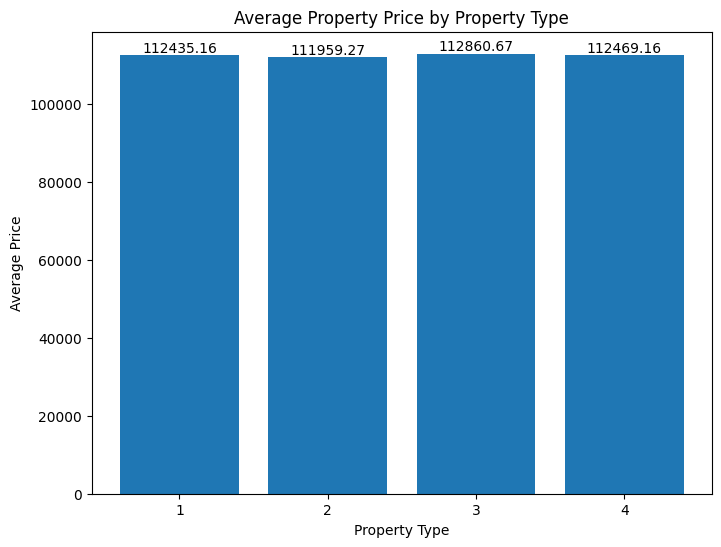

In [16]:
avg_price = df.groupby('Property Type', observed=False)['Property Price'].mean()

plt.figure(figsize=(8,6))
bars = plt.bar(avg_price.index.astype(str), avg_price.values)
plt.title('Average Property Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.show()



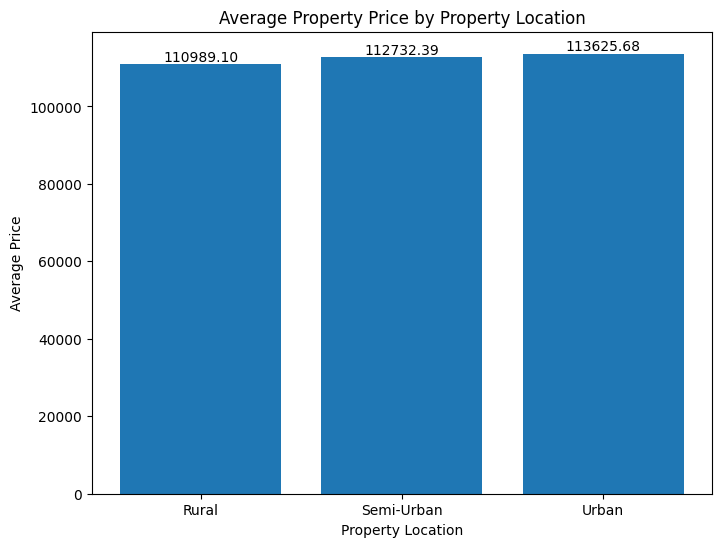

In [17]:
avg_price = df.groupby('Property Location', observed=False)['Property Price'].mean()

plt.figure(figsize=(8,6))
bars = plt.bar(avg_price.index.astype(str), avg_price.values)
plt.title('Average Property Price by Property Location')
plt.xlabel('Property Location')
plt.ylabel('Average Price')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.show()

In [18]:
print(df['Co-Applicant'].dtypes)

int64


In [19]:
df['Co-Applicant'] = df['Co-Applicant'].replace(-999, None)

In [20]:
df['Co-Applicant'].unique()

array([1, 0, None], dtype=object)

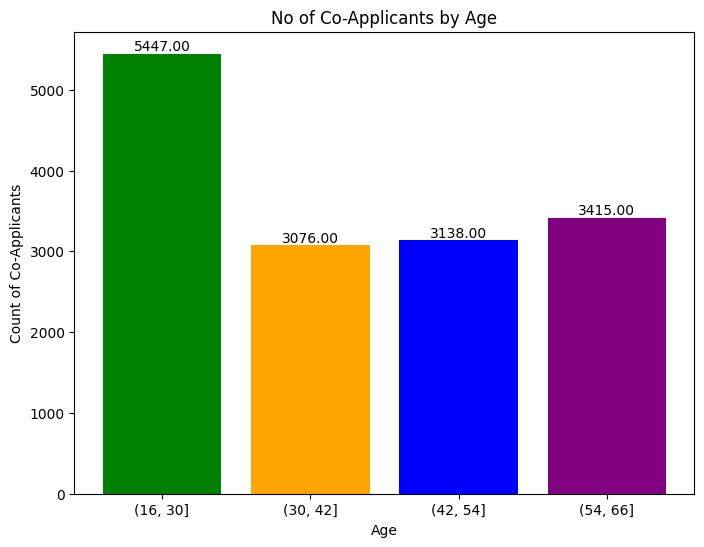

In [21]:
bins = [16, 30, 42, 54, 66]
colors = ['green', 'orange', 'blue', 'purple', 'yellow']
co = df.groupby(pd.cut(df['Age'], bins=bins), observed=False)['Co-Applicant'].sum().dropna()

plt.figure(figsize=(8,6))
plt.bar(co.index.astype(str).to_list(), co.values, color=colors)
plt.title('No of Co-Applicants by Age')
plt.xlabel('Age')
plt.ylabel('Count of Co-Applicants')

for i, val in enumerate(co.values):
    plt.text(i, val, f'{val:.2f}', ha='center', va='bottom')
plt.show()

In [22]:
print(df['Property Type'].unique())
print(df['Property Price'].unique())

[4 1 2 3]
[119933.46 221050.8   67993.43 ... 160826.31 307855.67  72890.06]


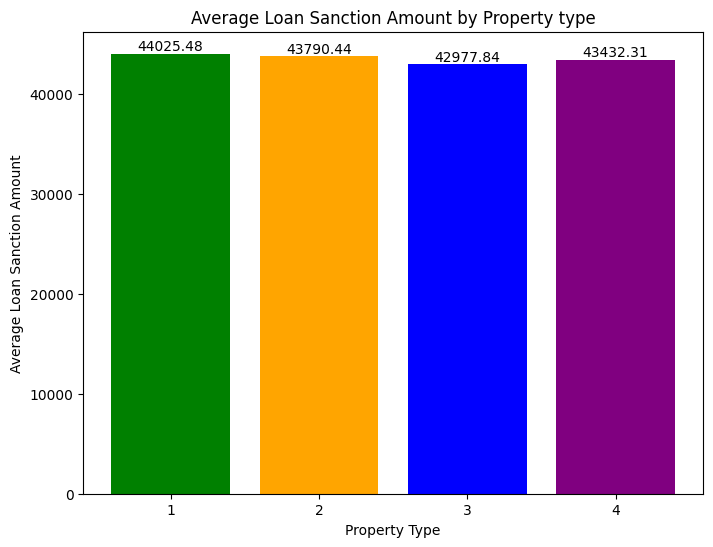

In [23]:

cal = df.groupby('Property Type')['Loan Sanction Amount (USD)'].mean()
colors = ['green', 'orange', 'blue', 'purple', 'yellow']

plt.figure(figsize=(8, 6))
plt.bar(cal.index.astype(str).to_list(), cal.values, color=colors)
plt.title('Average Loan Sanction Amount by Property type')
plt.xlabel('Property Type')
plt.ylabel('Average Loan Sanction Amount')

for i, val in enumerate(cal.values):
    plt.text(i, val, f'{val:.2f}', ha='center', va='bottom')
plt.show()

In [24]:
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,No. of Defaults,Has Active Credit Card,Property ID,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD),Cluster,Loan Approved
0,C-36995,Frederica Shealy,F,56,1933.05,1.0,Working,Sales staff,Semi-Urban,72809.58,...,0,Rural,746,4,Rural,1,119933.46,54607.18,2,1
1,C-23855,Nathalie Olivier,M,43,2361.56,1.0,Working,Laborers,Semi-Urban,152561.34,...,0,Semi-Urban,227,1,Semi-Urban,1,221050.80,0.00,0,0
2,C-24944,Barbie Goetsch,M,18,1546.17,1.0,Working,Laborers,Rural,42091.29,...,0,Urban,883,2,Urban,1,67993.43,0.00,1,0
3,C-40801,Laree Staton,M,18,2416.86,1.0,State servant,Core staff,Semi-Urban,25765.72,...,0,Rural,325,2,Rural,1,32423.71,16747.72,1,1
4,C-37677,Xenia Browder,F,39,2719.74,1.0,Commercial associate,High skill tech staff,Semi-Urban,20879.96,...,0,Rural,196,2,Rural,0,33568.47,0.00,1,0


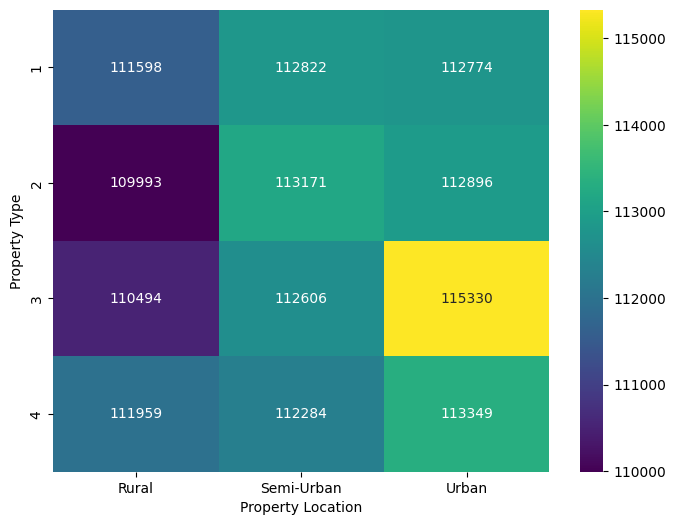

In [25]:
cal = df.groupby(['Property Type', 'Property Location'], observed=False)['Property Price'].mean().unstack()

plt.figure(figsize=(8,6))
sns.heatmap(cal, annot=True, cmap='viridis', fmt='g')
plt.ylabel('Property Type')
plt.xlabel('Property Location')
plt.show()

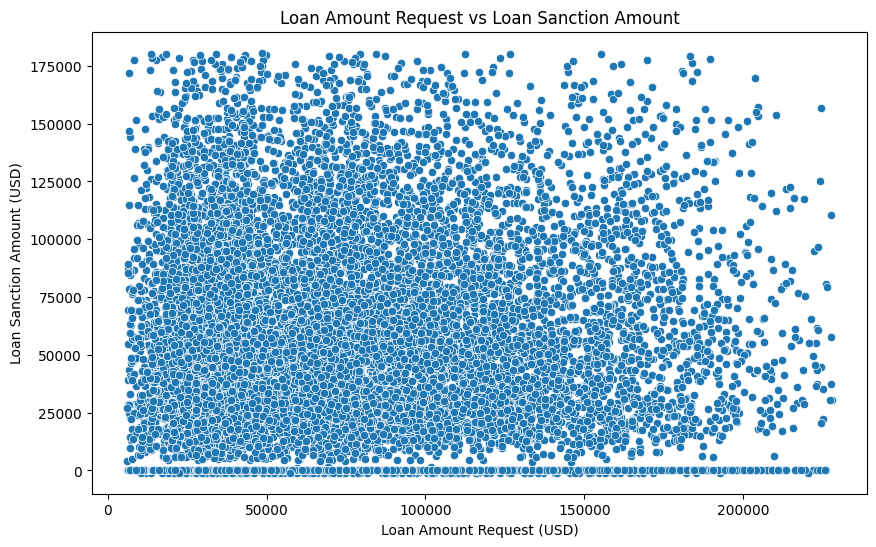

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Loan Amount Request (USD)'], y=df['Loan Sanction Amount (USD)'])
plt.title('Loan Amount Request vs Loan Sanction Amount')
plt.xlabel('Loan Amount Request (USD)')
plt.ylabel('Loan Sanction Amount (USD)')
plt.show()


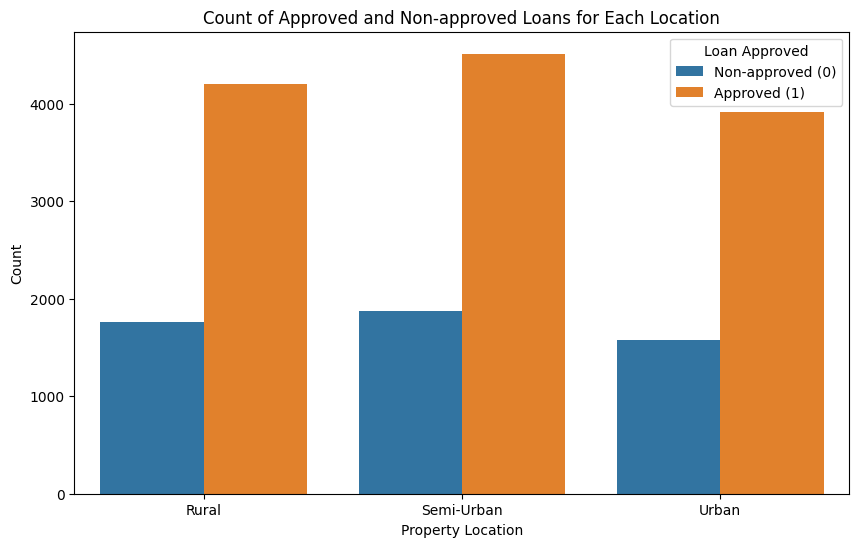

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Property Location', hue='Loan Approved', data=df)
plt.title('Count of Approved and Non-approved Loans for Each Location')
plt.xlabel('Property Location')
plt.ylabel('Count')
plt.legend(title='Loan Approved', loc='upper right', labels=['Non-approved (0)', 'Approved (1)'])
plt.show()

In [28]:
df['Profession'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Businessman'], dtype=object)

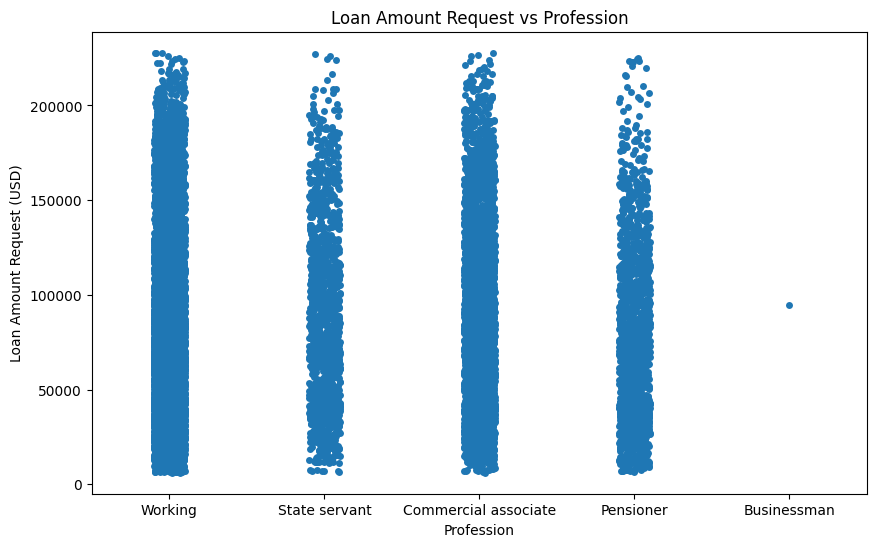

In [29]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='Profession', y='Loan Amount Request (USD)', data=df, jitter=True)
plt.title('Loan Amount Request vs Profession')
plt.xlabel('Profession')
plt.ylabel('Loan Amount Request (USD)')
plt.show()


In [30]:
df['Credit Score'].unique()

array([809.44, 637.29, 613.24, ..., 709.43, 869.61, 677.27])

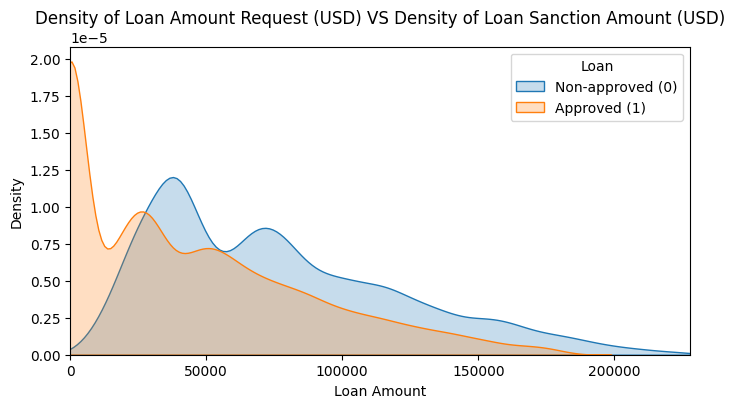

In [40]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df, x='Loan Amount Request (USD)', fill=True)
sns.kdeplot(data=df, x='Loan Sanction Amount (USD)', fill=True)
plt.title('Density of Loan Amount Request (USD) VS Density of Loan Sanction Amount (USD)')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.xlim(0, max(df['Loan Amount Request (USD)'].max(), df['Loan Sanction Amount (USD)'].max()))
plt.legend(title='Loan', loc='upper right', labels=['Non-approved (0)', 'Approved (1)'])
plt.show()